In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = [15, 7]
#plt.style.use('dark_background')

In [20]:
df = pd.read_csv('../linklog-12e76892661d5c48f53463199b1af121-11f69f48b6f0c336a3de86ebd43ece3d.csv', sep=';', names=['unacked', 'trip'])
df

,unacked,trip
0,0,11
1,0,11
2,0,3
3,8192,4
4,16384,4
...,...,...
7916,958464,1513
7917,966656,1513
7918,974848,1513
7919,983040,1514


In [17]:
xd = df['unacked'].values
yd = df['trip'].values

In [18]:
linear_regressor = LinearRegression()  
linear_regressor.fit(xd.reshape(-1, 1), yd.reshape(-1, 1))
yp = linear_regressor.predict(xd.reshape(-1, 1))
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[[0.0009321]]
[46.11625675]


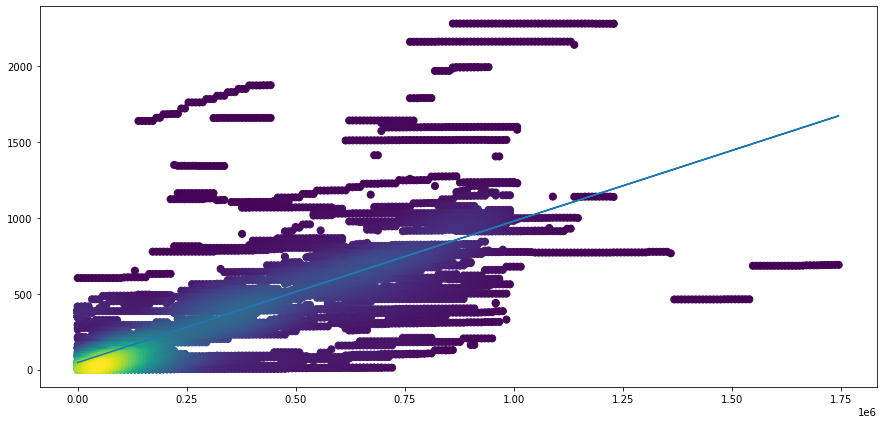

In [19]:
x = xd
y = yd

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
ax.plot(xd, yp)
plt.show()